## Importing the libraries

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## Function for Visualizing the images

In [ ]:
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()


## Loading our damaged images 

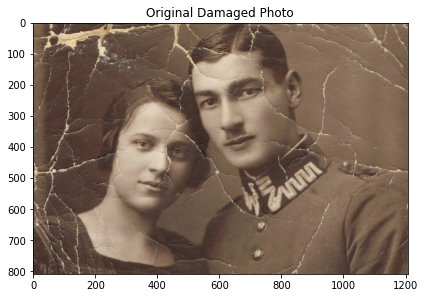

In [ ]:
image = cv2.imread('damaged.jpg')
imshow('Original Damaged Photo', image)

## Loaded Image with Damage Marks

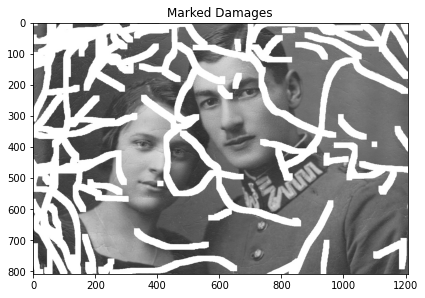

In [ ]:
marked_damages = cv2.imread('mask.jpg', 0)
imshow('Marked Damages', marked_damages)

## Thresholding 

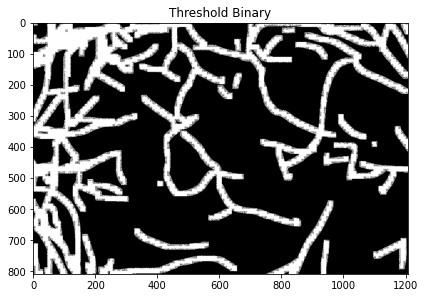

In [ ]:
ret, thresh1 = cv2.threshold(marked_damages, 254, 255, cv2.THRESH_BINARY)
imshow('Threshold Binary', thresh1)

## Dilation

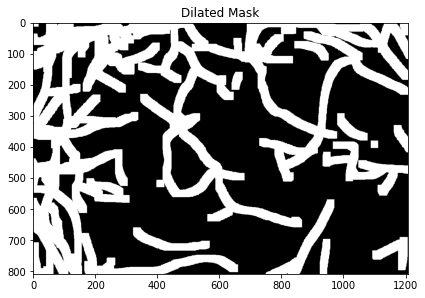

False

In [ ]:
kernel = np.ones((7,7), np.uint8)
mask = cv2.dilate(thresh1, kernel, iterations = 1)
imshow('Dilated Mask', mask)
cv2.imwrite("images/abraham_mask.png", mask)

## Using inPaint function

In [ ]:
restored = cv2.inpaint(image, mask, 3, cv2.INPAINT_TELEA)

## Visualizing the restored image

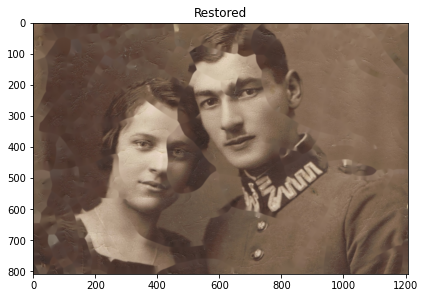

True

In [ ]:
imshow('Restored', restored)

cv2.imwrite("restored.jpg",restored)
cv2.imwrite("original.jpg",image)

## Compairing the images

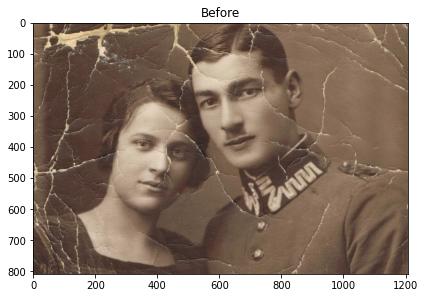

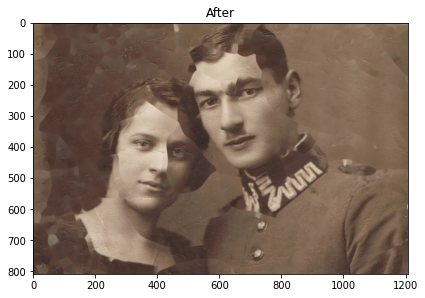

In [ ]:
imshow('Before', image)
imshow('After', restored)